# Classification Models Comparison

In [ ]:
# get data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

comparisons = pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/K-Nearest-Neighbors-Social-Network-Ads/master/Social_Network_Ads.csv')
print(comparisons.shape)
print(comparisons.head())
print(comparisons.info())

(400, 5)
    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


In [ ]:
# get X and y and train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comparisons.drop(['User ID', 'Gender', 'Purchased'], axis=1),
                                                    comparisons.Purchased,
                                                    test_size=0.2, random_state=42)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

## Logistic Regression

[[50  2]
 [ 9 19]]
0.8625


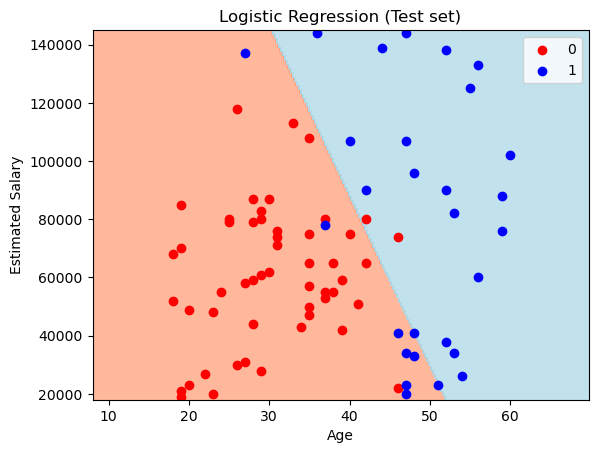

In [ ]:
# model, predict, evaluate, and plot
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightsalmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Multinomial Logistic Regression

See Week 10 - Multinomial Logistic Regression

## K Nearest Neighbor

* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg
* Choose the number of K neighbors
* Within the perimeter, count the number of each class
* New data point is assigned the class with the highest count

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[48  4]
 [ 3 25]]
0.9125


## Support Vector Classifier

https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png


The Support Vector Classifier (SVC) is a powerful, non-probabilistic linear model used for classification. Its fundamental goal is to find the optimal boundary—the **hyperplane**—that maximally separates two classes of data.

### The Geometric Goal

For two-class classification, the SVC process focuses on geometric optimization:

1.  **Identify the Hyperplane:** The **hyperplane** is the decision boundary used to separate the two classes (e.g., Class A and Class B). In a two-dimensional space, this is a line; in a three-dimensional space, it's a plane. It's mathematically analogous to a "line of best fit," but its purpose is separation, not prediction along a continuous scale.
2.  **Maximize the Margin:** The algorithm's primary objective is to maximize the **margin**, which is the distance between the two closest data points belonging to different classes. This produces the most robust, generalizable boundary.
3.  **Identify Boundary Hyperplanes:** The SVC identifies a **negative hyperplane** and a **positive hyperplane**, which run parallel to the main decision hyperplane and pass through the closest points of each class.

### Support Vectors: The Key Data Points

The name "Support Vector" comes from the crucial data points that define the margin:

* **Support Vectors:** These are the data points (the "apples that look like oranges and vice versa") that lie **on the boundary hyperplanes**. They are the hardest-to-classify examples and are the only observations that matter in defining the final decision boundary.
* **Significance:** Only the support vectors are used to compute the maximum margin and the position of the final separating hyperplane. If all other non-support vector data points were removed, the resulting hyperplane would not change.

### Handling Linearly Separable Data

The concepts described above—finding a straight hyperplane and maximizing the margin—apply directly when the data is **linearly separable**, meaning a single straight line or flat plane can completely divide the two classes. For non-linearly separable data, SVM uses the **Kernel Trick** to transform the data into a higher dimension where it *can* be separated by a plane.

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 9 19]]
0.8625


## SVC with Kernel

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 1 27]]
0.925


## More on Support Vectors

See Week 10 - Support Vectors

## Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 3 25]]
0.9375


## More on Naive Bayes

See Week 10 - Naive Bayes

## Decision Tree Classifier

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

#### Terms

* Root node
* Splitting
* Decision node
* Leaf / terminal node
* Pruning
* Branch
* Parent and child nodes

#### Attribute Selection Measures

* Gini index
* Entropy
* Information gain
* Gain ratio
* Reduction in variance
* Chi-square

More next week

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[46  6]
 [ 7 21]]
0.8375


## Random Forest Classifier

* Random sample of X_train when building trees
* Random subsets of features
* Bagging

More next week

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 6 22]]
0.8625
